# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t
from scipy.stats import norm
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows a big peak below \\$15,000, a much smaller bump between \\$32,000 and \\$52,000, on the right, and a very flat tail above \\$52,000.

The std deviation is very close to the mean and also very high. A high standard deviation means that the numbers are more spread out. We don't have a normal curve, the mean isn't useful here and all the std dev. tells us is that we have some very high (and very low) charges with respect to the "average".

These are not appropriate statistics for the data.

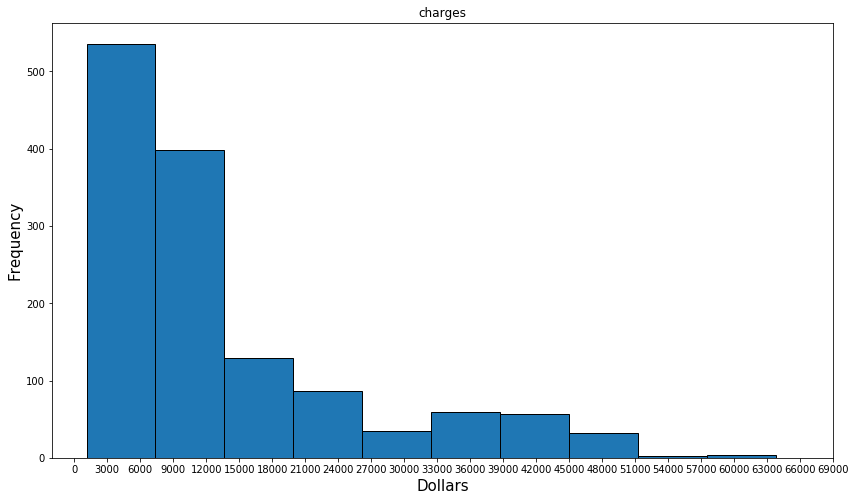

In [4]:
medical.hist(column='charges', bins=10, grid=False,
           figsize=(14,8), xlabelsize=10, edgecolor='k')
plt.xticks(range(0, 70000, 3000))
plt.xlabel("Dollars", fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

In [5]:
max(medical.charges)

63770.42801

In [6]:
m_mean = round(medical.charges.mean(), 2)
m_std = round(medical.charges.std(), 2)

print("mean:", m_mean, "\nstd. dev.:", m_std)

mean: 13270.42 
std. dev.: 12110.01


`pandas` std. deviation is equivalent to `numpy` corrected std. dev. with `ddof=1`.

In [7]:
m_median = round(medical.charges.median(), 2)
print("Median charge is", m_median)

Median charge is 9382.03


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ The mean is 13270.42, which isn't much higher than 12,000. The median charge is 9382.03, well under 12000. The histogram makes it pretty clear that charges less than 15000 are very common, but not less than 12000.

"Frequentist statistics is a type of statistical approach where conclusions are made based on the frequency of an event. This statistical approach determines the probability of a long-term experiment"

The most appropriate frequentist test would be to use the CLT to resample the means and work toward a better distribution, then ask "what is the probability of a charge of less than 12000"?

Start by doing more samples.



In [8]:
m = medical.charges.to_numpy()

seed(47)
sample_mean = []

# calculate 100 means sampled from the larger dataset
for n in range(100):
    this_sample = np.random.choice(m, 50)
    sample_mean.append(np.mean(this_sample))

mean_of_means = np.mean(sample_mean)
std_of_means = np.std(sample_mean, ddof=1)

print("mean", mean_of_means, "\nstd. dev.:", std_of_means)

mean 13326.1059319732 
std. dev.: 1475.7682660606786


Use our resampled mean (which hasn't changed much) and resampled std. dev. (which has narrowed a lot) to calculate the probability of a charge less than 12000.

In [9]:
norm.cdf(12000, loc=13326, scale=1476)

0.18449310083302167

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ A one-sided interval (less than) is more appropriate in this case. "In general, use a one-sided confidence interval instead of a two-sided confidence interval to obtain the tightest upper (lower) bound on a sample mean." [ref](https://vsp.pnnl.gov/help/Vsample/Stats_CI_One_Sided.htm)

The critical z value for a 95% confidence interval is 1.96.

margin of error = (critical value * pop std dev)

ci = mean +/- (margin of error / sqrt(sample size))

In [10]:
z = 1.96
std_dev = 1476
sample_size = 1338
mean = 13326

ci = (z * std_dev) / np.sqrt(sample_size)

print ((mean - ci),  "<",  mean, "<", (mean + ci))

13246.911311813235 < 13326 < 13405.088688186765


The administrator should not be concerned yet. The 95% confidence level puts the average minimum charge at 13344, not 12000 or less.

Try a t-test. (Why a t-test?)

_One-Sample T-Test
Tests whether the mean of a normally distributed population is different from a specified value._ [ref](https://medium.com/@kangeugine/hypothesis-test-21795f788f7d)
   * Null Hypothesis: states that the population mean is equal to some value.
   * Alternative Hypothesis: states that the mean does not equal/is greater than/is less than some value.

But we don't have a normally distributed population. Perhaps if we use he CLT and the mean we got from resampling.

See Also: [How to Calculate Critical Values for Statistical Hypothesis Testing with Python](https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/)

In [11]:
n = len(medical.charges)
dof = n - 1
p = 0.95
critical_value = stats.t.ppf(p, dof)
std_dev = 1476
mean = 13326

print("critical value", critical_value)
ci = ((critical_value * std_dev) / np.sqrt(n))
print(mean - ci, "<", mean, "<", mean + ci)


critical value 1.6459941145571317
13259.581879957419 < 13326 < 13392.418120042581


What if we pretend that we believe the original dataset is normally distributed?

(The following exercise (inferential statistics 2) appears to assume we should have believed this.)

In [12]:
ci2 = critical_value * medical.charges.std() / np.sqrt(n) 

# Lower bound
medical.charges.mean() - ci2

12725.48718381623

_The t test (also called Student’s T Test) compares two averages (means) and tells you if they are different from each other. The t test also tells you how significant the differences are; In other words it lets you know if those differences could have happened by chance._ [ref](https://towardsdatascience.com/inferential-statistics-series-t-test-using-numpy-2718f8f9bf2f)

If p-value is less than the predetermined value of significance, reject null hypothesis and accept alternative hypothesis.

If we just want a yes or no answer, we can do this.

In [13]:
# Null Hypothesis: the population mean is equal to 12000

stats.ttest_1samp(medical.charges, 12000)

Ttest_1sampResult(statistic=3.8373517196585314, pvalue=0.000130171652092872)

The t-statistic is the ratio of the departure of the estimated value of a parameter from its hypothesized value to its standard error. _I have no idea how to interpret this_.

However, the pvalue is very small and 1/2 the pvalue would be smaller, so I'd say the mean is not 12000.

Can we use any of this info to give us an idea of what it thinks the 95% confidence interval is?

Try [this](https://www.dummies.com/education/math/statistics/using-the-t-distribution-to-calculate-confidence-intervals/)

`mean +/- t*(s/sqrt(n))`

So... the t-statistic is related to the critical value. 

_The observation values in the population beyond the critical value are often called the “critical region” or the “region of rejection“._

_Critical Value: A value appearing in tables for specified statistical tests indicating at what computed value the null hypothesis can be rejected (the computed statistic falls in the rejection region)._ [ref](https://machinelearningmastery.com/critical-values-for-statistical-hypothesis-testing/)

_If the statistic is less than or equal to the critical value, we fail to reject the null hypothesis (e.g. no effect). Otherwise it is rejected._

So, if the t-statistic is larger than the critical value, it means that the mean we pushed through the function is outside the confidence interval we asked for.  In other words, the critical value can give us a range; the test statistic gives us a yes/no answer.


In [14]:
null_hypothesis = "the mean is 12000"
print ("The calculated critical value is", critical_value)
t_statistic, pvalue = stats.ttest_1samp(medical.charges, 12000)
print ("The calculated t-statistic is", t_statistic)

if (t_statistic <= critical_value):
    # fail to reject the null hypohesis
    print("We cannot reject the hypothesis that", null_hypothesis)
else:
    # reject the null hypothesis
     print("We reject the hypothesis that", null_hypothesis)
   

The calculated critical value is 1.6459941145571317
The calculated t-statistic is 3.8373517196585314
We reject the hypothesis that the mean is 12000


---------------

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that there is no difference between people with insurance and people without insurance, that the average charge is the same.

The alternative hypothesis is that the administrator's fears are true and people with insurance are charged more (or less) than those without insurance.

"What assumption about the variances of the two groups are we making here?" We're assuming that the variance is roughly the same and we can combine these two groups (pool the standard deviations) in this way.


__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}


In [15]:
# not insured
ins0 = medical.loc[medical.insuranceclaim == 0]

# not insured
ins1 = medical.loc[medical.insuranceclaim == 1]


In [16]:

n0 = len(ins0)
s0 = (ins0.charges.std())
x0 = (ins0.charges.mean())

n1 = len(ins1)
s1 = (ins1.charges.std())
x1 = (ins1.charges.mean())

print("uninsured\n", "count", n0, "mean", x0, "std. dev.", s0)
print("\n")
print("insured\n", "count", n1, "mean", x1, "std. dev.", s1)

a = (n0 - 1)*s0**2
b = (n1 - 1)*s1**2

dof = (n0 + n1 - 2)

sp = np.sqrt((a + b)/dof)

print("dof:", dof, "sp:", sp)

t_stat = ((x0 - x1)/(sp*(np.sqrt(1/n0 + 1/n1))))

print("\nt stat:", t_stat)

uninsured
 count 555 mean 8821.421892306294 std. dev. 6446.510126811736


insured
 count 783 mean 16423.928276537663 std. dev. 14045.928418802127
dof: 1336 sp: 11520.034268775256

t stat: -11.89329903087671


---------------------

After a lot of searching, I found [this](https://support.minitab.com/en-us/minitab/18/help-and-how-to/statistics/basic-statistics/supporting-topics/basics/manually-calculate-a-p-value/):

   * For a lower-tailed test, the p-value is equal to this probability; p-value = cdf(ts).
   * For an upper-tailed test, the p-value is equal to one minus this probability; p-value = 1 - cdf(ts).
   * For a two-sided test, the p-value is equal to two times the p-value for the lower-tailed p-value if the value of the test statistic from your sample is negative. However, the p-value is equal to two times the p-value for the upper-tailed p-value if the value of the test statistic from your sample is positive.


In [17]:
cdf = stats.t.cdf(t_stat,df=dof)

# For a two-sided test, if the value of the test statistic from 
# your sample is negative, then the p-value is equal to 
# two times the p-value for the lower-tailed p-value 
# (i.e. 2 * cdf(ts))
# 
p_val = 2 * cdf    

print("p value:", p_val)

p value: 4.461230231620972e-31


In [18]:
# using the appropriate function from scipy.stats
# Calculate the T-test for the means of two independent samples.
# stats.ttest_ind
# This is a two-sided test for the null hypothesis that 2 independent
# samples have identical average (expected) values. This test assumes
# that the populations have identical variances by default.

t_stat, p_val = stats.ttest_ind(ins0.charges, ins1.charges)
print("t stat:", t_stat, "p value:", p_val)

t stat: -11.893299030876712 p value: 4.461230231620717e-31


   * A large t-score tells you that the groups are different.
   * A small t-score tells you that the groups are similar.
   
   Is -11.9 "small"? 4.46e-31 is essentially 0.
   
   Or is 11 large?

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

<span style="color:red"> **Hooboy yes**</span>

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ Given hat this is a very non-normal distribution, I'd bet on he side of "the sample variances are not equal".

Set `equal_var = False`

In [19]:
t_stat, p_val = stats.ttest_ind(ins0.charges, ins1.charges, equal_var = False)
print("t stat:", t_stat, "p value:", p_val)

t stat: -13.298031957975649 p value: 1.1105103216309125e-37


At which point the p_value is even smaller.

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ `scipy` `stats` has a `zscore` method.
```
scipy.stats.zscore(a, axis=0, ddof=0)[source]
Calculates the z score of each value in the sample, relative to the sample mean 
and standard deviation.
```

The `statsmodel` package has this:
```
statsmodels.stats.weightstats.ztest(x1, x2=None, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)[source]
test for mean based on normal distribution, one or two samples
```

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test

<hr style="border: 5px solid green;">

I may have good hands-on experience but I am still confused.